# Évolution de la population mondiale

__Pierre SAUNDERS__

## Librairies utilisées

_Environnement tidyverse_
- [Doc](https://readxl.tidyverse.org/) - readxl : Permet la lecture de fichiers Excel (xlsx/xls)
- [Doc](https://ggplot2.tidyverse.org/reference/) - ggplot2 : Permet de faire des plots à partir de DataFrame

_Autres_
- [Doc](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html) - gridExtra : Add-on de ggplot2 permettant des plots multiples sur la même image.

In [1]:
libraries = c("readxl", "ggplot2", "gridExtra")
code = lapply(libraries[!libraries %in% installed.packages()], install.packages, type = "binary",
              repos = "http://cran.us.r-project.org")
code = lapply(libraries, library, character.only = TRUE)
rm(code, libraries)

## Étude

Il est bien connu que la population mondiale compte désormais plus de sept milliards et demi d’individus et qu’elle est en augmentation constante.
Par contre, on dit que la population européenne n’augmente que très légèrement au fil des années et qu’elle de plus en plus âgée.
Afin de vérifier ces deux affirmations, nous allons utiliser la base donnée qui se trouve [ici](https://www.kaggle.com/theworldbank/global-population-estimates).
Il s’agira d’utiliser les données dans la plage 1960-2010 pour calculer la moyenne et variance des variables aléatoires qui nous intéressent.
Puis on utilisera les données de 2011 à 2017 comme ́échantillon pour la vérification des hypothèses.
On utilisera la même technique d’exploitation des séries temporelles pour ́étudier la proportion de population âgée de plus de 65 ans par rapport au reste de la population.
En prenant les données qui se trouvent [ici](https://www.insee.fr/fr/statistiques/2387502), fournies par l’INSEE, est-ce que l'on peut ́établir une corrélation entre le niveau de dépenses de santé et le vieillissement de la population ?

### Hypothèses

1. Corrélation positive entre l'année et la population mondiale
2. Moyenne population européenne de $[1960, 2010]$ < Moyenne population européenne de $[2011, 2017]$
3. Croissance mondiale de $[1960, 2010]$ > Croissance européenne de $[2011, 2017]$
4. Proportion de personne européenne âgée de plus de 65 ans en $[1960, 2010]$ < Proportion de personne européenne âgée de plus de 65 ans en $[2011, 2017]$
5. Corrélation entre l'espérance de vie et la dépense de santé courante (INSEE) en Europe

Toutes les hypothèses seront testées avec un niveau de signification $\alpha = 0.05$

#### Test de Student

##### Fonction t-value pour échantillons indépendants

- $\bar{X}$ : moyenne observée
- $n$ : taille échantillon
- $\sigma$ : écart-type

$\rightarrow$ pour chaque population $A$ et $B$

Note: Variance = $\sigma^2$

$\large{t = \frac{\bar{X}_{A}-\bar{X}_B}{\sqrt{\frac{\sigma_{A}^2}{n_A}+\frac{\sigma_{B}^2}{n_B}}}}$

In [2]:
test_student_independants = function(pop_a, pop_b){
    (mean(pop_a) - mean(pop_b)) / sqrt(var(pop_a) / length(pop_a) + var(pop_b) / length(pop_b))
}

#### Test d'hypothèse

In [3]:
test_hypothese = function(pop1, pop2, lower.tail = TRUE, alpha = 5e-2){
    t_value = test_student_independants(pop1, pop2)
    print(paste("t_value =", t_value))
    ddl = length(pop1) + length(pop2) - 2
    p_value = qt(alpha, df = ddl, lower.tail = lower.tail)
    print(paste("ddl =", ddl))
    print(paste("p_value =", p_value))
    if(lower.tail) print(paste("t_value < p_value ?", t_value < p_value))
    else           print(paste("t_value > p_value ?", t_value > p_value))
}

## Fichier Global Population estimates (Kaggle)

In [4]:
estim = read.csv("data/data.csv", stringsAsFactors = TRUE)
estim = estim[-c((nrow(estim) - 4) : nrow(estim)), ] # Suppression des filigranes
colnames(estim)[1] = "Country.Name" # Correction caractère UTF-8
print(sprintf("Le fichier estim.xlsx possède %d * %d lignes", ncol(estim), nrow(estim)))
head(estim)

[1] "Le fichier estim.xlsx possède 95 * 44807 lignes"


,Country.Name,Country.Code,Series.Name,Series.Code,X1960..YR1960.,X1961..YR1961.,X1962..YR1962.,X1963..YR1963.,X1964..YR1964.,X1965..YR1965.,⋯,X2041..YR2041.,X2042..YR2042.,X2043..YR2043.,X2044..YR2044.,X2045..YR2045.,X2046..YR2046.,X2047..YR2047.,X2048..YR2048.,X2049..YR2049.,X2050..YR2050.
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,Age dependency ratio (% of working-age population),SP.POP.DPND,8.171774e+01,8.275591e+01,8.330457e+01,8.355074e+01,8.373445e+01,8.396216e+01,⋯,49.057098,48.405124,47.772482,47.153619,4.654737e+01,46.014974,45.488733,44.972113,44.471497,4.399248e+01
2,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.086262e+00,5.132609e+00,5.139524e+00,5.111895e+00,5.056182e+00,4.976304e+00,⋯,6.254638,6.431854,6.615935,6.808329,7.010657e+00,7.235972,7.465706,7.699483,7.935899,8.175734e+00
3,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,7.663148e+01,7.762330e+01,7.816505e+01,7.843884e+01,7.867827e+01,7.898586e+01,⋯,42.802460,41.973270,41.156547,40.345290,3.953671e+01,38.779002,38.023028,37.272630,36.535598,3.581675e+01
4,Afghanistan,AFG,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,1.785560e+05,1.826740e+05,1.854340e+05,1.875130e+05,1.899450e+05,1.935530e+05,⋯,NA,NA,NA,NA,4.520000e+05,NA,NA,NA,NA,4.300000e+05
5,Afghanistan,AFG,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,1.776350e+05,1.815880e+05,1.858520e+05,1.904620e+05,1.954980e+05,2.010140e+05,⋯,NA,NA,NA,NA,4.760000e+05,NA,NA,NA,NA,4.520000e+05
6,Afghanistan,AFG,"Age population, age 01, female, interpolated",SP.POP.AG01.FE.IN,1.623200e+05,1.714910e+05,1.699620e+05,1.738000e+05,1.779260e+05,1.825620e+05,⋯,NA,NA,NA,NA,4.540000e+05,NA,NA,NA,NA,4.320000e+05


### Transformation, pré-traitement

La base de données est très fourni (43 Mo pour 95 colonnes * 44807 lignes), mais seul certaines informations nous intéressent.
Nous allons ne garder que les lignes concernant l'Union Européenne et le monde, et parmi ces lignes nous allons garder ne que la population totale (réduit à l'échelle du million), la croissance et l'espérance.

In [5]:
years_mask = c(5 : 95)
norm = 1e6
x = as.numeric(lapply(colnames(estim)[years_mask], function(x){ substr(x, 2, 5) }))

y = estim[estim$'Country.Name' == 'European Union', ]
y1_1 = as.numeric(y[y$'Series.Code' == 'SP.POP.TOTL', years_mask]) / norm
y1_2 = as.numeric(y[y$'Series.Code' == 'SP.POP.GROW', years_mask])
y1_3 = as.numeric(y[y$'Series.Code' == 'SP.DYN.LE00.IN', years_mask])
y1_4 = as.numeric(y[y$'Series.Code' == 'SP.POP.65UP.TO.ZS', years_mask])
y = estim[estim$'Country.Name' == 'World', ]
y2_1 = as.numeric(y[y$'Series.Code' == 'SP.POP.TOTL', years_mask]) / norm
y2_2 = as.numeric(y[y$'Series.Code' == 'SP.POP.GROW', years_mask])
y2_3 = as.numeric(y[y$'Series.Code' == 'SP.DYN.LE00.IN', years_mask])

df = data.frame(x, y1_1, y1_2, y1_3, y1_4, y2_1, y2_2, y2_3)
colnames(df) = c("Annee", "Population_euro", "Croissance_euro",
                 "Esperance_euro", "Senior", "Population_mondiale",
                 "Croissance_mondiale", "Esperance_mondiale")

#### Aperçu de la dataframe

In [6]:
head(df)

,Annee,Population_euro,Croissance_euro,Esperance_euro,Senior,Population_mondiale,Croissance_mondiale,Esperance_mondiale
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,409.4985,NA,69.27954,9.834965,3034.193,NA,52.47476
2,1961,413.0070,0.8567903,69.58937,9.978808,3075.115,1.348696,52.98085
3,1962,416.6706,0.8870627,69.51457,10.126404,3127.961,1.718509,53.40420
4,1963,420.3933,0.8934289,69.75930,10.277910,3192.794,2.072689,53.93546
5,1964,424.0759,0.8759809,70.22604,10.433138,3258.201,2.048585,54.61296
6,1965,427.5926,0.8292731,70.33690,10.596198,3324.952,2.048681,55.28044


### Exemples de graphiques

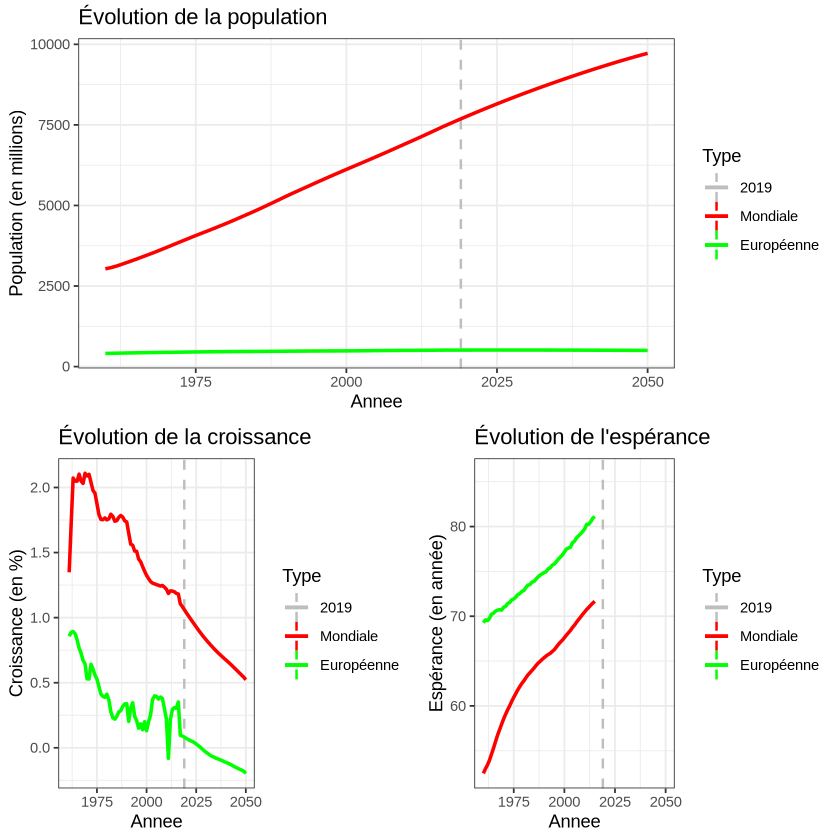

In [7]:
p1 = ggplot(df, aes(x = Annee)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", linewidth = 0.7) +
     geom_line(aes(y = Population_mondiale, colour = "1"), linewidth = 1, na.rm = TRUE) +
     geom_line(aes(y = Population_euro, colour = "2"), linewidth = 1, na.rm = TRUE) +
     ylab("Population (en millions)") + ggtitle("Évolution de la population") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne"))

p2 = ggplot(df, aes(x = Annee)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", linewidth = 0.7) +
     geom_line(aes(y = Croissance_mondiale, colour = "1"), linewidth = 1, na.rm = TRUE) +
     geom_line(aes(y = Croissance_euro, colour = "2"), linewidth = 1, na.rm = TRUE) +
     ylab("Croissance (en %)") + ggtitle("Évolution de la croissance") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne"))

p3 = ggplot(df, aes(x = Annee)) + theme_bw() +
     geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", linewidth = 0.7) +
     geom_line(aes(y = Esperance_mondiale, colour = "1"), linewidth = 1, na.rm = TRUE) +
     geom_line(aes(y = Esperance_euro, colour = "2"), linewidth = 1, na.rm = TRUE) +
     ylab("Espérance (en année)") + ggtitle("Évolution de l'espérance") +
     scale_colour_manual(name = "Type", values = c("grey", "red", "green"), labels = c("2019", "Mondiale", "Européenne"))

grid.arrange(p1, arrangeGrob(p2, p3, ncol = 2))

## Corrélation positive entre la population mondiale et l'année (Hypothèse 1)

Nous voyons visuellement que l'évolution de la population mondiale est linéaire et croissante.
Pour prouver cela, nous allons l'approcher par une régression linéaire d'une fonction affine de type $\hat{Y} = ax + b$ et évaluer son coefficient de détermination. S'il est suffisamment proche de 1, nous ne pouvons pas rejeter cette hypothèse.

Nous allons donc placer une ligne aux coefficients $a$ et $b$ de telle sorte que $\hat{Y}$ soit suffisamment proche de la data $Y$ (i.e. $\epsilon_i$ est suffisamment bas).

$\large{y_i = b + a x_i + \epsilon_i}$

Nous mesurerons l'écart entre les deux droites avec l'erreur quadratique moyenne (ou Mean Squared Error MSE).

$\large{
\epsilon_i = y_i-ax_i+b \hspace{1cm}
J(a,b) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon_i^2
}$

Pour nous faciliter la vie, nous allons écrire le tout avec des vecteurs.

Nos prédictions seront alors dans un vecteur $\hat{Y} = X.\theta$

$\large{
\theta = \begin{bmatrix}b\\a\end{bmatrix} \hspace{1cm}
Y = \begin{bmatrix} y_1\\ y_2 \\ ... \\ y_m \end{bmatrix} \hspace{1cm}
X = \begin{bmatrix} 1&x_1 \\ 1&x_2 \\ ...&... \\ 1&x_m \end{bmatrix} \hspace{1cm}
}$

$\large{\epsilon = y_i - (\theta_0 + \theta_1 x_i) = Y-X.\theta} = Y - \hat{Y}$

$\large{J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m\epsilon^2}$

Pour pouvoir faire une régression linéaire le plus adéquat possible, on cherche à minimiser cette erreur $J(\theta)$, la fonction étant convexe, nous cherchons alors à résoudre

$\large{ \frac{\partial J(\theta)}{\partial\theta} = 0}$

Pas à pas cela nous donne d'abord $\theta_0$

$\large{\frac{\partial J(\theta)}{\partial\theta_0} = \frac{\partial J(\theta)}{\partial\epsilon} \cdot \frac{\partial\epsilon}{\partial\theta_0} = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m 2(Y_i-\theta_0-\theta_1X_i) * 1}$

$\large{0 = 2\sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^m(Y_i-\theta_0-\theta_1X_i)}$

$\large{0 = \sum\limits_{i=1}^mY_i -m\theta_0-\theta_1\sum\limits_{i=1}^mX_i}$

$\large{m\theta_0 = \sum\limits_{i=1}^mY_i -\theta_1\sum\limits_{i=1}^mX_i}$

$\large{\large{\theta_0 = \bar{Y} -\theta_1 \bar{X}}}$

Ensuite pour $\theta_1$

$\large{\frac{\partial J(\theta)}{\partial\theta_1} = \sum\limits_{i=1}^m(Y_i-\theta_0+\theta_1X_i)^2}$

$\large{0 = \sum\limits_{i=1}^m -2(Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = -2\sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (Y_i-\theta_0-\theta_1X_i)X_i}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i-\theta_0 X-\theta_1X_i^2)}$

$\large{0 = \sum\limits_{i=1}^m (X_iY_i) - \theta_0\sum\limits_{i_1}^m X_i - \theta_1\sum\limits_{i=1}^m X_i^2}$

$\large{0 = \overline{XY} - \theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{-\overline{XY} = -\theta_0\bar{X} - \theta_1\bar{X^2}}$

$\large{\overline{XY} = \theta_0\bar{X} + \theta_1\bar{X^2}}$

Avec le résultat $\theta_0$ obtenu précédemment

$\large{\overline{XY} = (\bar{Y} - \theta_1\bar{X})\bar{X} + \theta_1\bar{X^2}}$

$\large{\overline{XY} = \bar{Y}\bar{X} - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = - \theta_1\bar{X}^2 + \theta_1\bar{X^2}}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1\bar{X^2} - \theta_1\bar{X}^2}$

$\large{\overline{XY} - \bar{Y}\bar{X} = \theta_1(\bar{X^2} - \bar{X}^2)}$

$\large{\theta_1 = \frac{\overline{XY} - \bar{Y}\bar{X}}{\bar{X^2} - \bar{X}^2}}$

Chaque échantillon étant indépendant $E(X) = \frac{1}{m}\sum\limits_{i=1}^m X_i$

$\large{\theta_1 = \frac{
E(X,Y) - E(X)E(Y)
}{
(\frac{1}{m}\sum\limits_{i=1}^m X_i^2) - \bar{X}^2
}}$

$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2}}$

### Maintenant que cela est dit, passons au code

$\large{\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n x_i}$

In [8]:
x_bar = mean(df$Annee)
print(paste("x_bar =", x_bar))

[1] "x_bar = 2005"


$\large{\bar{Y} = \frac{1}{n}\sum\limits_{i=1}^n y_i}$

In [9]:
y_bar = mean(df$Population_mondiale)
print(paste("y_bar =", y_bar))

[1] "y_bar = 6473.45632771129"


$\large{\theta_1 = \frac{Cov(X,Y)}{\sigma_x^2}}$

In [10]:
theta_1 = cov(df$Annee, df$Population_mondiale) / var(df$Annee)
print(paste("theta_1 =", theta_1))

[1] "theta_1 = 78.2438930928207"


$\large{\theta_0 = \bar{Y} - \theta_1 \bar{X}}$

In [11]:
theta_0 = y_bar - theta_1 * x_bar
print(paste("theta_0 =", theta_0))

[1] "theta_0 = -150405.549323394"


$\large{\hat{Y} = \hat{f}(x) = \theta_0 + \theta_1 x}$

In [12]:
df$Prediction = theta_0 + theta_1 * df$Annee

### Visualisation de la prédiction

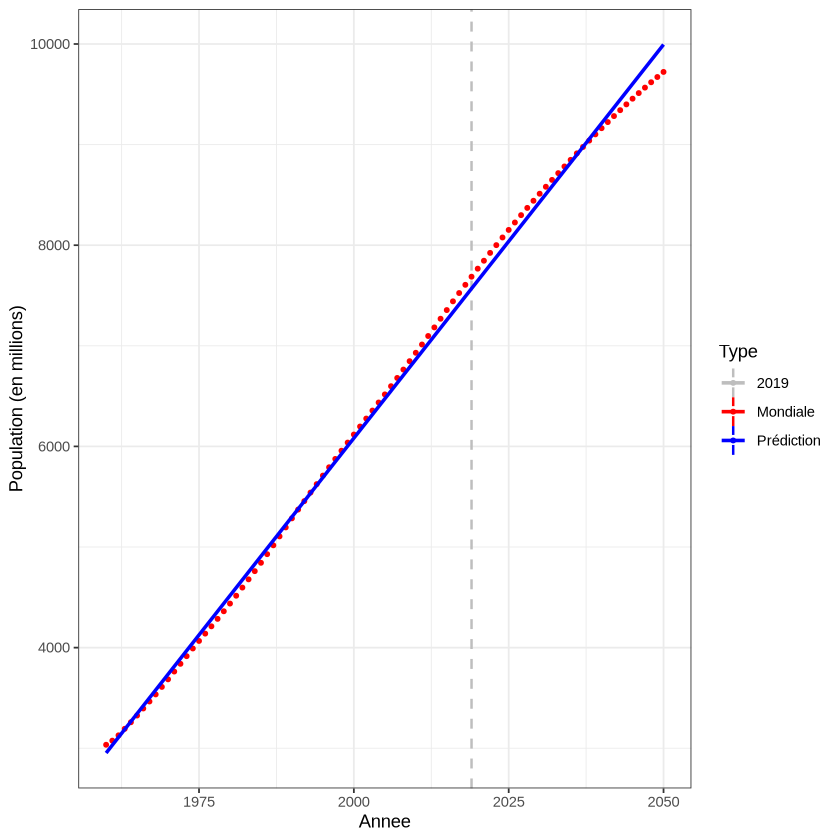

In [13]:
ggplot(df, aes(x = Annee)) + theme_bw() + ylab("Population (en millions)") +
    geom_point(aes(y = Population_mondiale, colour = "1"), size = 1) +
    geom_vline(aes(xintercept = 2019, colour = "0"), linetype = "dashed", linewidth = 0.7) +
    geom_line(aes(y = Prediction, colour = "2"), linewidth = 1) +
    scale_colour_manual(name = "Type", values = c("grey", "red", "blue"), labels = c("2019", "Mondiale", "Prédiction"))

### Mesure de l'adéquation du modèle

Analyse de la variance

Somme totale des carrés = Somme des carrés de régression + Somme des carrés des erreurs

$\large{SST = SSR + SSE}$

$\large{\sum\limits_{i=1}^m(y_i-\bar{y})^2 = \sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2 + \sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}$

In [14]:
y_bar = mean(df$Population_mondiale)
print(paste("y_bar =", y_bar))
sst = sum((df$Population_mondiale - y_bar)^2)
print(paste("sst =", sst))
ssr = sum((df$Prediction - y_bar)^2)
print(paste("ssr =", ssr))
sse = sum((df$Population_mondiale - df$Prediction)^2)
print(paste("sse =", sse))

[1] "y_bar = 6473.45632771129"
[1] "sst = 385075719.013343"
[1] "ssr = 384407086.36888"
[1] "sse = 668632.644463659"


Critère relatif

$R^2$: coefficient de détermination

$\large{R^2 = \frac{SSR}{SST} = \frac{\sum\limits_{i=1}^m(\hat{y}_i-\bar{y})^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

Ou

$\large{R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum\limits_{i=1}^m(y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^m(y_i-\bar{y})^2}}$

$0 \leq R^2 \leq 1$

$R^2 \approx 1 \rightarrow$ Le modèle est adéquat.

$R^2 \approx 0 \rightarrow$ Le modèle est inadéquat.

In [15]:
print(paste("R^2 =", 1 - sse/sst))

[1] "R^2 = 0.998263633328591"


In [16]:
print(paste("R^2 =", ssr / sst))

[1] "R^2 = 0.998263633328592"


__Notre modèle explique 99.83% de la variance des données__

$R$: Coefficient de corrélation

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ corrélation négative

$R \approx 0 \rightarrow$ aucune corrélation

$R \approx 1 \rightarrow$ corrélation positive

In [17]:
r = cov(df$Annee, df$Population_mondiale) / (sd(df$Annee) * sd(df$Population_mondiale))
print(paste("R =", r))

[1] "R = 0.999131439465595"


__Notre modèle ne nous permet pas de rejeter l'hypothèse $H_0$__

#### Unités de mesure de l'adéquation du modèle

Moyenne des erreurs absolues (UK: Mean Absolute Error)

$\large{MAE = \frac{1}{N}\sum\limits_{i=1}^N|y_i-\hat{y}_i|}$

In [18]:
print(paste("MAE =", mean(abs(df$Population_mondiale - df$Prediction))))

[1] "MAE = 69.3300518887301"


Moyenne des racines des erreurs (UK: Mean Squared Error)

$\large{MSE = \frac{1}{N}\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{SSE}{N}}$

In [19]:
mse = sse / (length(df$Annee))
print(paste("MSE =", mse))

[1] "MSE = 7347.61147762263"


Racine de la moyenne des racines des erreurs (UK: Root Mean Squared Error)

$\large{RMSE = \sqrt{MSE}}$

In [20]:
rmse = sqrt(mse)
print(paste("RMSE =", rmse))

[1] "RMSE = 85.7182097201209"


## Analyse de résidus

- Formule de résidu
$\rightarrow \large{\epsilon_i = y_i - \hat{y}_i}$

- Résidu studentisés
$\rightarrow \large{\epsilon_i = \frac{y_i - \hat{y}_i}{RMSE\sqrt{1-h_i}}}$

où
$\rightarrow \large{h_i=\frac{1}{N}+\frac{(x_i-\bar{x})^2}{\sum\limits_{i=1}^N(x_i-\bar{x})^2}}$

In [21]:
x_bar = mean(df$Annee)
h = 1 / length(df$Annee) + ((df$Annee - x_bar)^2) / sum((df$Annee - x_bar)^2)
e = (df$Population_mondiale - df$Prediction) / (sqrt(1 - h))
stde = (df$Population_mondiale - df$Prediction) / (rmse * sqrt(1 - h))
residus = data.frame(x = df$Annee, "Influence" = h, "Résidus" = e, stde = stde)

### Visualisation

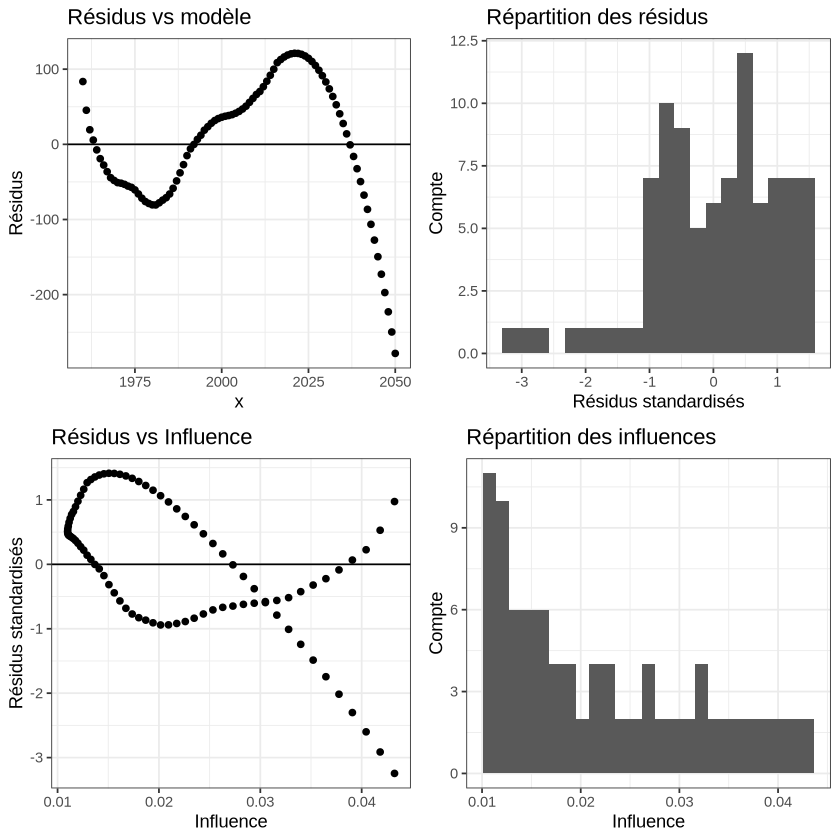

In [22]:
rvl = ggplot(residus) + theme_bw() +
    geom_point(aes(x = Influence, y = stde)) +
    ylab("Résidus standardisés") +
    geom_hline(aes(yintercept = 0)) +
    ggtitle("Résidus vs Influence")

hist_e = ggplot(residus) + theme_bw() +
    geom_histogram(aes(x = stde), bins = 20) +
    xlab("Résidus standardisés") + ylab("Compte") +
    ggtitle("Répartition des résidus")

rvf = ggplot(residus) + theme_bw() +
    geom_point(aes(x = x, y = Résidus)) +
    geom_hline(aes(yintercept = 0)) +
    ggtitle("Résidus vs modèle")

hist_l = ggplot(residus) + theme_bw() +
    geom_histogram(aes(x = Influence), bins = 25) +
    ylab("Compte") + xlab("Influence") +
    ggtitle("Répartition des influences")

grid.arrange(rvf, hist_e, rvl, hist_l)

## La moyenne de la population a augmenté entre $[1960, 2010]$ et $[2011, 2017]$ (Hypothèse 2)

Nous allons donc tester l'hypothèse (unilatérale gauche) suivante

$\mu_{pop1} = \frac{1}{n}\sum\limits_{i=1}^n population\_mondiale[1960, 2010]^{(i)} \hspace{1cm} \mu_{pop2} = \frac{1}{n}\sum\limits_{i=1}^n population\_mondiale[2011, 2017]^{(i)}$

$H_0 = \mu_{pop1} - \mu_{pop2} \geq 0$

$H_1 = \mu_{pop1} - \mu_{pop2} < 0$

In [23]:
df_1 = df[df$Annee >= 1960 & df$Annee <= 2010, ]
df_2 = df[df$Annee >= 2011 & df$Annee <= 2017, ]
test_hypothese(df_1$Population_mondiale, df_2$Population_mondiale)

[1] "t_value = -13.1374810522537"
[1] "ddl = 56"
[1] "p_value = -1.67252230307558"
[1] "t_value < p_value ? TRUE"


__On peut donc rejeter l'hypothèse $H_0$__

## La croissance mondiale de $[1960, 2010]$ est supérieure à la croissance européenne $[2011, 2017]$ (Hypothèse 3)

Nous allons donc tester l'hypothèse (unilatérale gauche) suivante

$C_{m} = \frac{1}{n}\sum\limits_{i=1}^n croissance\_mondiale[1960, 2010]^{(i)} \hspace{1cm} C_{e} = \frac{1}{n}\sum\limits_{i=1}^n croissance\_europeenne[2011, 2017]^{(i)}$

$H_0 = C_{m} - C_{e} \geq 0$

$H_1 = C_{m} - C_{e} < 0$

In [24]:
pop1 = df_1$Croissance_mondiale[-c(1)] # La première valeur est NA
test_hypothese(pop1, df_2$Croissance_euro)

[1] "t_value = 20.2333656712816"
[1] "ddl = 55"
[1] "p_value = -1.67303396528991"
[1] "t_value < p_value ? FALSE"


__On ne peut donc pas rejeter l'hypothèse $H_0$__

## La proportion de personne européenne âgée de plus de 65 ans est inférieure en $[1960, 2010]$ qu'en $[2011, 2017]$ (Hypothèse 4)

Nous allons donc tester l'hypothèse (unilatérale droite) suivante

$S_1 = \frac{1}{n}\sum\limits_{i=1}^n proportion\_senior[1960, 2010]^{(i)} \hspace{1cm} S_{2} = \frac{1}{n}\sum\limits_{i=1}^n proportion\_senior[2011, 2017]^{(i)}$

$H_0 = S_1 - S_2 \leq 0$

$H_1 = S_1 - S_2 > 0$

In [25]:
test_hypothese(df_1$Senior, df_2$Senior, FALSE)

[1] "t_value = -12.7890414432725"
[1] "ddl = 56"
[1] "p_value = 1.67252230307558"
[1] "t_value > p_value ? FALSE"


__On ne peut donc pas rejeter l'hypothèse $H_0$__

## Fichier dépense courante de santé dans les pays de l'OCDE (INSEE)

In [26]:
dep = read_excel("data/cond-sante-dep-courante-monde.xlsx", skip = 3, n_max = 37)[, c(0 : 17)]
print(sprintf("Le fichier cond-sante-dep-courante-monde.xlsx possède %d * %d lignes", ncol(dep), nrow(dep)))
head(dep)

[1] "Le fichier cond-sante-dep-courante-monde.xlsx possède 17 * 37 lignes"


Pays,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Royaume-Uni,7.195,7.567,7.941,8.112,8.390,8.441,8.608,8.785,9.064,9.881,9.835,9.848,9.914,9.976,9.950,9.901
Allemagne,9.888,9.920,10.184,10.402,10.146,10.312,10.180,10.051,10.251,11.238,11.096,10.778,10.853,10.998,11.022,11.184
France,9.584,9.706,10.022,10.083,10.164,10.215,10.386,10.316,10.501,11.288,11.226,11.185,11.297,11.416,11.544,11.448
Autriche,9.204,9.269,9.395,9.547,9.709,9.627,9.531,9.532,9.726,10.226,10.221,10.026,10.199,10.286,10.368,10.368
Suède,7.327,7.900,8.210,8.317,8.130,8.151,8.052,7.996,8.208,8.770,8.320,10.416,10.735,10.905,10.948,10.804
Norvège,7.712,8.022,9.001,9.215,8.821,8.328,7.913,8.051,7.961,9.074,8.906,8.789,8.778,8.930,9.345,10.131


### Transposition en dataframe

In [27]:
dep = t(dep)
colnames(dep) = dep[1, ]
rownames(dep) = NULL
dep = data.frame(apply(dep[-c(1), ], 2, function(x) as.numeric(as.character(x))))
dep = data.frame(Annee = (0 : 15) + 2e3, dep)
head(dep)

,Annee,Royaume.Uni,Allemagne,France,Autriche,Suède,Norvège,Pays.Bas,Danemark,Portugal,⋯,Australie,Espagne,Nouvelle.Zélande,Grèce,Colombie,Israël,Lettonie,Hongrie,Luxembourg,Turquie
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,7.195,9.888,9.584,9.204,7.327,7.712,7.707,8.104,8.601,⋯,7.614,6.799,7.470,7.243,5.635,6.783,5.440,6.778,5.901,4.600
2,2001,7.567,9.920,9.706,9.269,7.900,8.022,8.059,8.448,8.628,⋯,7.696,6.769,7.579,7.988,5.942,7.210,5.778,6.826,6.410,4.888
3,2002,7.941,10.184,10.022,9.395,8.210,9.001,8.649,8.703,8.786,⋯,7.893,6.801,7.900,8.234,5.733,7.131,5.770,7.121,6.738,5.062
4,2003,8.112,10.402,10.083,9.547,8.317,9.215,9.057,8.904,9.124,⋯,7.904,7.563,7.722,8.449,5.775,7.069,5.490,8.119,6.971,5.014
5,2004,8.390,10.146,10.164,9.709,8.130,8.821,9.111,9.007,9.533,⋯,8.109,7.658,7.901,8.094,5.799,7.013,6.217,7.770,7.347,4.910
6,2005,8.441,10.312,10.215,9.627,8.151,8.328,9.097,9.091,9.653,⋯,7.990,7.731,8.273,8.565,6.067,7.117,5.848,8.001,7.184,4.894


### Suppression des états ne faisant pas parti de l'Union Européenne

In [28]:
hors_eu = c("États.Unis", "Japon", "Chili", "Corée.du.sud", "Slovénie", "Israël", "Mexique", "Turquie", "Canada", "Australie", "Nouvelle.Zélande", "Colombie")
dep = dep[!(colnames(dep) %in% hors_eu)]
head(dep)

,Annee,Royaume.Uni,Allemagne,France,Autriche,Suède,Norvège,Pays.Bas,Danemark,Portugal,⋯,Lituanie,Irlande,Pologne,Suisse,Belgique,Espagne,Grèce,Lettonie,Hongrie,Luxembourg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,7.195,9.888,9.584,9.204,7.327,7.712,7.707,8.104,8.601,⋯,6.200,5.904,5.288,9.114,7.999,6.799,7.243,5.440,6.778,5.901
2,2001,7.567,9.920,9.706,9.269,7.900,8.022,8.059,8.448,8.628,⋯,6.013,6.397,5.667,9.439,8.150,6.769,7.988,5.778,6.826,6.410
3,2002,7.941,10.184,10.022,9.395,8.210,9.001,8.649,8.703,8.786,⋯,6.144,6.675,6.067,9.852,8.318,6.801,8.234,5.770,7.121,6.738
4,2003,8.112,10.402,10.083,9.547,8.317,9.215,9.057,8.904,9.124,⋯,6.186,7.010,5.954,10.109,9.208,7.563,8.449,5.490,8.119,6.971
5,2004,8.390,10.146,10.164,9.709,8.130,8.821,9.111,9.007,9.533,⋯,5.511,7.223,5.868,10.185,9.367,7.658,8.094,6.217,7.770,7.347
6,2005,8.441,10.312,10.215,9.627,8.151,8.328,9.097,9.091,9.653,⋯,5.648,7.646,5.807,10.004,9.261,7.731,8.565,5.848,8.001,7.184


### Traduction des noms des pays en Anglais

In [29]:
original_names = c('Annee', 'Royaume.Uni', 'Allemagne', 'France', 'Autriche', 'Suède', 'Norvège', 'Pays.Bas', 'Danemark', 'Portugal',
                   'Islande', 'Italie', 'Finlande', 'République.tchèque', 'Estonie', 'Slovaquie', 'Lituanie', 'Irlande', 'Pologne', 
                   'Suisse', 'Belgique', 'Espagne', 'Grèce', 'Lettonie', 'Hongrie', 'Luxembourg')
dep = dep[, original_names]
trad = c('Annee', 'United Kingdom', 'Germany', 'France', 'Austria', 'Sweden', 'Norway', 'Netherlands', 'Denmark', 'Portugal', 'Iceland',
         'Italy', 'Finland', 'Czech Republic', 'Estonia', 'Slovakia', 'Lithuania', 'Ireland', 'Poland', 'Switzerland', 'Belgium', 'Spain',
         'Greece', 'Latvia', 'Hungary', 'Luxembourg')
head(dep)

,Annee,Royaume.Uni,Allemagne,France,Autriche,Suède,Norvège,Pays.Bas,Danemark,Portugal,⋯,Lituanie,Irlande,Pologne,Suisse,Belgique,Espagne,Grèce,Lettonie,Hongrie,Luxembourg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,7.195,9.888,9.584,9.204,7.327,7.712,7.707,8.104,8.601,⋯,6.200,5.904,5.288,9.114,7.999,6.799,7.243,5.440,6.778,5.901
2,2001,7.567,9.920,9.706,9.269,7.900,8.022,8.059,8.448,8.628,⋯,6.013,6.397,5.667,9.439,8.150,6.769,7.988,5.778,6.826,6.410
3,2002,7.941,10.184,10.022,9.395,8.210,9.001,8.649,8.703,8.786,⋯,6.144,6.675,6.067,9.852,8.318,6.801,8.234,5.770,7.121,6.738
4,2003,8.112,10.402,10.083,9.547,8.317,9.215,9.057,8.904,9.124,⋯,6.186,7.010,5.954,10.109,9.208,7.563,8.449,5.490,8.119,6.971
5,2004,8.390,10.146,10.164,9.709,8.130,8.821,9.111,9.007,9.533,⋯,5.511,7.223,5.868,10.185,9.367,7.658,8.094,6.217,7.770,7.347
6,2005,8.441,10.312,10.215,9.627,8.151,8.328,9.097,9.091,9.653,⋯,5.648,7.646,5.807,10.004,9.261,7.731,8.565,5.848,8.001,7.184


## Est ce qu'il existe une corrélation entre l'espérance de vie et la dépense de santé courante en Europe (Hypothèse 5)

Nous allons calculer le coefficient de corrélation pour chaque pays en croisant les data frames

Pour rappel:

$R = \frac{Cov(X,Y)}{\sigma_{x}\sigma_{y}}$

$R \approx -1 \rightarrow$ corrélation négative

$R \approx 0 \rightarrow$ aucune corrélation

$R \approx 1 \rightarrow$ corrélation positive

In [30]:
esp = estim[estim$'Series.Code' == 'SP.DYN.LE00.IN' & estim$'Country.Name' %in% trad, c(1, 45 : 60)]
esp = t(as.data.frame(esp))
rownames(esp) = NULL
colnames(esp) = esp[1, ]
esp = esp[-c(1), ]
esp = data.frame(Annee = (0 : 15) + 2e3, esp)
head(esp)

,Annee,Austria,Belgium,Czech.Republic,Denmark,Estonia,Finland,France,Germany,Greece,⋯,Lithuania,Luxembourg,Netherlands,Norway,Poland,Portugal,Spain,Sweden,Switzerland,United.Kingdom
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2000,78.12683,77.72195,74.96829,76.59268,70.41707,77.46585,79.05610,77.92683,77.88780,⋯,72.01951,77.87317,77.98780,78.63415,73.74878,76.31463,78.96585,79.64390,79.68049,77.74146
2,2001,78.57561,77.97317,75.17317,76.79268,70.25854,77.96585,79.15854,78.32927,78.38780,⋯,71.65854,77.82439,78.19024,78.78537,74.20000,76.81463,79.36829,79.79512,80.18049,77.99268
3,2002,78.67805,78.07561,75.22195,76.89512,70.90488,78.11951,79.26098,78.22927,78.64146,⋯,71.76098,77.96585,78.29268,78.98780,74.49756,77.06585,79.56829,79.84634,80.38537,78.14390
4,2003,78.63171,78.12927,75.17073,77.14390,71.31707,78.36829,79.11463,78.38049,78.84146,⋯,72.06098,77.72683,78.49268,79.39024,74.59756,77.21951,79.61951,80.09512,80.53659,78.44634
5,2004,79.18049,78.87805,75.72195,77.49268,71.90976,78.71463,80.16341,78.68049,79.03902,⋯,71.96098,79.12195,79.09512,79.84146,74.84634,77.67073,79.87073,80.49756,81.08780,78.74634
6,2005,79.33171,78.98049,75.92439,77.84390,72.56829,78.81707,80.16341,78.93171,79.23902,⋯,71.25366,79.43171,79.34634,80.04146,74.99512,78.07073,80.17073,80.54634,81.23659,79.04878


### Calcul des coefficients R

[1] "Coefficient r moyen = 0.598377"
[1] "Coefficient r médian = 0.822553"


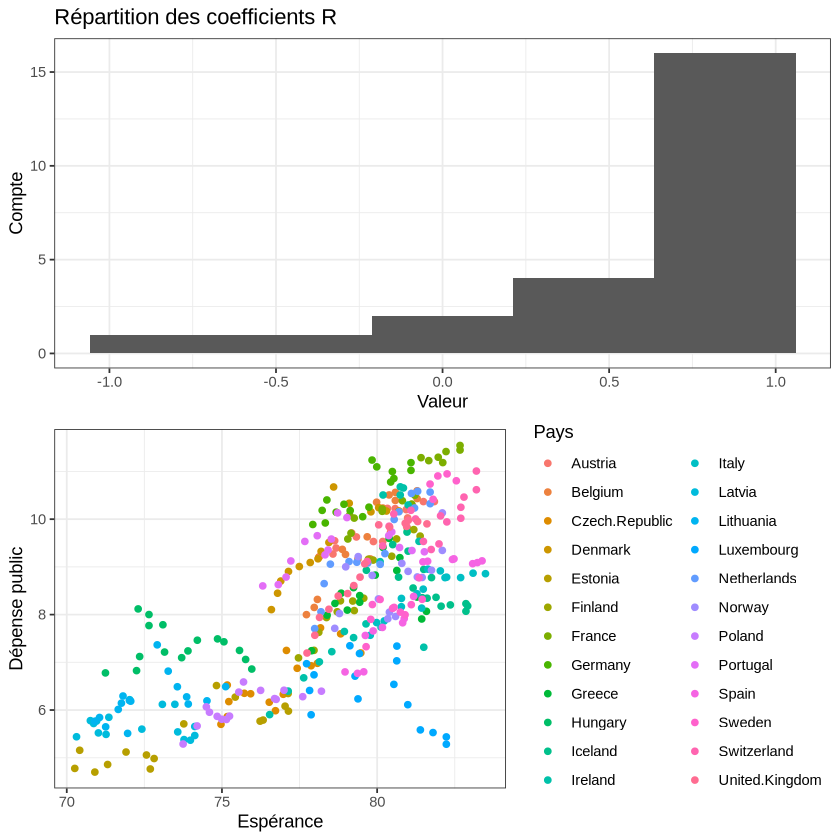

In [31]:
esp_names = colnames(esp)
indexes = match(esp_names, gsub(" ", ".", trad))
coef_r = c()
xs = c()
xs = c()
ys = c()
country_names = c()
for(i in (2 : length(indexes))){
    x = as.numeric(as.character(esp[, i]))
    xs = c(xs, x)
    y = dep[, indexes[i]]
    ys = c(ys, y)
    cxy = cov(x, y)
    sdxy = sd(x) * sd(y)
    coef_r = c(coef_r, cxy / sdxy)
    country_names = c(country_names, rep(esp_names[i], length(x)))
}
coefs_r = data.frame(Index = (1 : length(coef_r)), "Valeur" = coef_r)
insee = data.frame("Pays" = country_names, "Espérance" = xs, "Depense public" = ys)

print(sprintf("Coefficient r moyen = %f", mean(coefs_r$Valeur)))
print(sprintf("Coefficient r médian = %f", median(coefs_r$Valeur)))

h1 = ggplot(coefs_r) + ylab("Compte") + theme_bw() +
     geom_histogram(aes(x = Valeur), bins = 5) +
     ggtitle("Répartition des coefficients R")     

h2 = ggplot(insee) + ylab("Dépense public") + theme_bw() +
     geom_point(aes(x = Espérance, y = Depense.public, col = Pays))     

grid.arrange(h1, h2)

On peut donc en conclure qu'il existe une corrélation entre l'espérance de vie et la dépense de santé courante.

_Pierre Saunders @saundersp_